In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [2]:
em = pd.read_csv('Employee_Performance.csv')

In [3]:
em.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


## Data Analysis

In [4]:
em['Gender'].value_counts()

Male      725
Female    475
Name: Gender, dtype: int64

In [5]:
No_of_employee = em['Gender'].value_counts().sum()

In [6]:
No_of_employee

1200

In [7]:
em.set_index('EmpNumber', inplace=True)

In [8]:
em['EmpDepartment'].unique()

array(['Sales', 'Human Resources', 'Development', 'Data Science',
       'Research & Development', 'Finance'], dtype=object)

In [9]:
em['EmpJobRole'].unique()

array(['Sales Executive', 'Manager', 'Developer', 'Sales Representative',
       'Human Resources', 'Senior Developer', 'Data Scientist',
       'Senior Manager R&D', 'Laboratory Technician',
       'Manufacturing Director', 'Research Scientist',
       'Healthcare Representative', 'Research Director', 'Manager R&D',
       'Finance Manager', 'Technical Architect', 'Business Analyst',
       'Technical Lead', 'Delivery Manager'], dtype=object)

In [10]:
em['PerformanceRating'].unique()

array([3, 4, 2], dtype=int64)

In [11]:
em['EmpRelationshipSatisfaction'].unique()

array([4, 3, 2, 1], dtype=int64)

In [12]:
em.groupby('EmpDepartment')['EmpJobRole'].value_counts()

EmpDepartment           EmpJobRole               
Data Science            Data Scientist                20
Development             Developer                    236
                        Senior Developer              52
                        Technical Lead                38
                        Business Analyst              16
                        Delivery Manager              12
                        Technical Architect            7
Finance                 Finance Manager               49
Human Resources         Human Resources               45
                        Manager                        9
Research & Development  Manager R&D                   94
                        Research Scientist            77
                        Laboratory Technician         64
                        Healthcare Representative     33
                        Manufacturing Director        33
                        Research Director             19
                        Senior Manager

In [13]:
EmpRelationshipSatisfaction = em.groupby('EmpDepartment')['EmpRelationshipSatisfaction'].value_counts()

In [14]:
EmpRelationshipSatisfaction

EmpDepartment           EmpRelationshipSatisfaction
Data Science            1                                5
                        2                                5
                        3                                5
                        4                                5
Development             3                              122
                        4                              118
                        2                               64
                        1                               57
Finance                 3                               16
                        4                               14
                        1                               10
                        2                                9
Human Resources         3                               21
                        4                               17
                        2                                9
                        1                                7
Rese

In [15]:
enviorment_Satisfaction=EmpRelationshipSatisfaction.groupby(level=0).apply(lambda x: round(100 * x/x.sum()))

In [16]:
enviorment_Satisfaction

EmpDepartment           EmpRelationshipSatisfaction
Data Science            1                              25.0
                        2                              25.0
                        3                              25.0
                        4                              25.0
Development             3                              34.0
                        4                              33.0
                        2                              18.0
                        1                              16.0
Finance                 3                              33.0
                        4                              29.0
                        1                              20.0
                        2                              18.0
Human Resources         3                              39.0
                        4                              31.0
                        2                              17.0
                        1                       

# Data visualization

<Figure size 2880x2880 with 0 Axes>

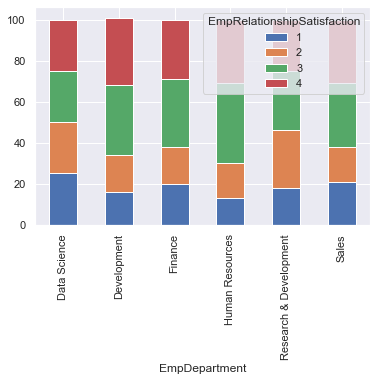

In [17]:
plt.figure(figsize=(40,40))
enviorment_Satisfaction.unstack().plot(kind='bar', stacked=True)

In [18]:
PerformanceRating = em.groupby('EmpDepartment')['PerformanceRating'].value_counts()

In [19]:
enviorment_rating=PerformanceRating.groupby(level=0).apply(lambda x: round(100 * x/x.sum()))

<Figure size 2880x2880 with 0 Axes>

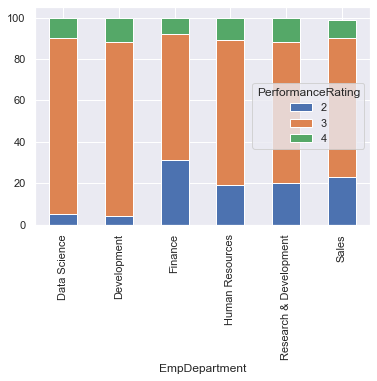

In [20]:
plt.figure(figsize=(40,40))
enviorment_rating.unstack().plot(kind='bar', stacked=True)

In [21]:
correlation = em.corr()
correlation['PerformanceRating']

Age                            -0.040164
DistanceFromHome               -0.046142
EmpEducationLevel               0.020529
EmpEnvironmentSatisfaction      0.395561
EmpHourlyRate                  -0.043116
EmpJobInvolvement              -0.010539
EmpJobLevel                    -0.076632
EmpJobSatisfaction              0.000606
NumCompaniesWorked              0.020980
EmpLastSalaryHikePercent        0.333722
EmpRelationshipSatisfaction    -0.019502
TotalWorkExperienceInYears     -0.068141
TrainingTimesLastYear          -0.005443
EmpWorkLifeBalance              0.124429
ExperienceYearsAtThisCompany   -0.111645
ExperienceYearsInCurrentRole   -0.147638
YearsSinceLastPromotion        -0.167629
YearsWithCurrManager           -0.122313
PerformanceRating               1.000000
Name: PerformanceRating, dtype: float64

In [22]:
# corr = em.corr()
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True
# # Heatmap
# plt.figure(figsize=(15, 10))
# sns.heatmap(corr,
#             vmax=.5,
#             mask=mask,
#              annot=True, fmt='.2f',
#             linewidths=.2, cmap="YlGnBu")

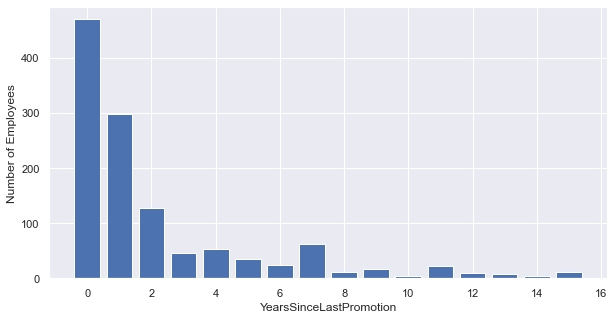

In [23]:
fig=plt.subplots(figsize=(10,5))
promotion = em.groupby('YearsSinceLastPromotion').count()
plt.bar(promotion.index.values, promotion['PerformanceRating'])
plt.xlabel('YearsSinceLastPromotion')
plt.ylabel('Number of Employees')
plt.show()

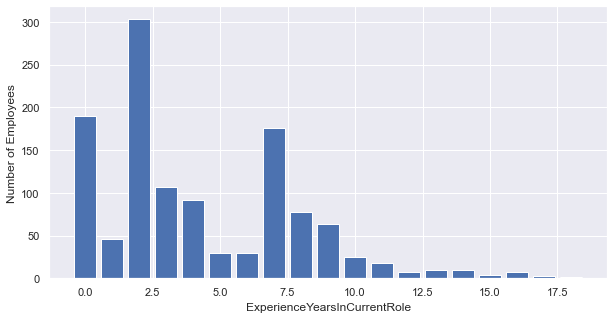

In [24]:
fig=plt.subplots(figsize=(10,5))
experince = em.groupby('ExperienceYearsInCurrentRole').count()
plt.bar(experince.index.values, experince['PerformanceRating'])
plt.xlabel('ExperienceYearsInCurrentRole')
plt.ylabel('Number of Employees')
plt.show()

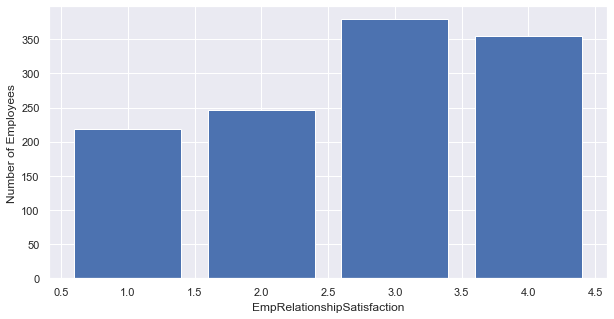

In [25]:
fig=plt.subplots(figsize=(10,5))
satisfaction = em.groupby('EmpRelationshipSatisfaction').count()
plt.bar(satisfaction.index.values, satisfaction['PerformanceRating'])
plt.xlabel('EmpRelationshipSatisfaction')
plt.ylabel('Number of Employees')
plt.show()

# Machine Learning

In [26]:
training_data = em[['YearsSinceLastPromotion', 'EmpEnvironmentSatisfaction', 'EmpLastSalaryHikePercent']]
#training_data = em.copy()

In [27]:
training_data.isnull().sum()

YearsSinceLastPromotion       0
EmpEnvironmentSatisfaction    0
EmpLastSalaryHikePercent      0
dtype: int64

In [28]:
# training_data.drop('PerformanceRating', axis=1, inplace=True)

In [29]:
output_data = em['PerformanceRating']

In [30]:
training_data.head(2)

,YearsSinceLastPromotion,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent
EmpNumber,,,
E1001000,0,4,12
E1001006,1,4,12


In [31]:
training_data.select_dtypes(include='object').columns

Index([], dtype='object')

In [32]:
# training_data.drop(training_data.select_dtypes(include='object').columns, axis=1, inplace=True)

In [33]:
training_data.dtypes

YearsSinceLastPromotion       int64
EmpEnvironmentSatisfaction    int64
EmpLastSalaryHikePercent      int64
dtype: object

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X, x_test, Y, y_test = train_test_split(training_data, output_data, test_size=0.3, random_state=42)

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
model = DecisionTreeClassifier()

In [38]:
model.fit(X, Y)

DecisionTreeClassifier()

In [39]:
predictions = model.predict(x_test)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [41]:
accuracy_score(predictions, y_test)

0.8305555555555556